In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
# warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import make_classification

n_female = 2000
n_male = 4000
prop_C0_female = 0.2
prop_C0_male = 0.5

X_female, Y_female = make_classification(n_features=5, n_redundant=0, n_informative=4, n_clusters_per_class=3, n_classes=2, 
                                         n_samples=n_female, weights=[prop_C0_female,1-prop_C0_female],
                                         class_sep=1.5, random_state=1)

X_male, Y_male = make_classification(n_features=5, n_redundant=0, n_informative=4, n_clusters_per_class=2, n_classes=2, 
                                     n_samples=n_male, weights=[prop_C0_male,1-prop_C0_male],
                                     class_sep=0.5, random_state=2)

d_female = pd.DataFrame(X_female)
d_female['gender'] = np.repeat(1, X_female.shape[0])

d_male = pd.DataFrame(X_male)
d_male['gender'] = np.repeat(0, X_male.shape[0])

X = pd.concat([d_female, d_male], ignore_index=True)
Y = pd.concat([pd.DataFrame(Y_female), pd.DataFrame(Y_male)], ignore_index=True)

In [4]:
# Visualising data
print(X, Y)

             0         1         2         3         4  gender
0     0.229548 -2.438005 -0.186303  0.852436  2.808742       1
1     0.819007  2.312640 -0.630271  0.134232 -0.944876       1
2    -1.261035  1.396648  0.575212 -1.830779  0.594373       1
3     0.111126  1.898722  3.275775 -0.545386  2.397211       1
4     1.355302  0.942848  0.817374 -2.162899 -0.388616       1
...        ...       ...       ...       ...       ...     ...
5995 -0.239024  0.002201 -0.441324  0.118903  0.897106       0
5996 -1.751068 -0.676502 -0.562043  0.930878 -0.343174       0
5997 -1.410618 -0.513539 -0.556735  0.794218  0.120883       0
5998 -0.747589 -1.097868 -0.271512 -0.148640 -0.774787       0
5999  0.430207 -1.455315  1.451952 -1.595540  0.763136       0

[6000 rows x 6 columns]       0
0     0
1     0
2     1
3     1
4     1
...  ..
5995  0
5996  0
5997  0
5998  0
5999  1

[6000 rows x 1 columns]


In [5]:
data = X.copy()
data['class'] = Y

# g = sns.PairGrid(data, hue="class", palette=sns.color_palette("husl", 2))
# g.map_lower(sns.kdeplot, levels=4)
# g.map_upper(sns.scatterplot, size=0)
# g.map_diag(sns.histplot, element="step", linewidth=0, kde=False)

## 3. Applying Classification 

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

In [37]:
from sklearn.ensemble import RandomForestClassifier
algo_rf = RandomForestClassifier()
model_rf = algo_rf.fit(X_train, y_train[0].values.ravel())


In [40]:
# Evaluation
from sklearn.metrics import accuracy_score

y_predicted = model_rf.predict(X_test)
accuracy_score(y_test, y_predicted)

0.9616666666666667

## Preprocessing for Bias-Aware clustering 

In [69]:
# Converting y_hat from Np to DF
predictions_col = pd.DataFrame()
predictions_col['predicted_class'] = y_predicted
predictions_col['true_class'] = y_test
predictions_col['errors'] = abs(predictions_col['predicted_class'] - predictions_col['true_class'])

all_data = pd.merge(X_test, predictions_col, left_index = True, right_index = True)
errors = all_data['errors']
# df_out = entire_dataset.drop(['predicted_class', 'true_class'], axis=1)
all_data

,0,1,2,3,4,gender,predicted_class,true_class,errors
234,0.120596,-1.579177,2.388662,1.671851,-1.184714,1,1,1.0,0.0
867,0.305027,-1.870605,-1.847159,1.907773,-1.543284,1,0,1.0,1.0
276,0.141040,-0.802851,-0.743099,2.475461,-1.132825,1,0,1.0,1.0
250,-0.415619,2.053641,0.574834,-1.939174,2.277749,1,1,1.0,0.0
368,-1.320955,2.867467,-2.508202,3.439601,-1.827220,1,1,0.0,1.0
...,...,...,...,...,...,...,...,...,...
123,0.470468,-1.150494,-1.456778,2.307264,-2.199542,1,0,1.0,1.0
1051,-1.251658,0.515249,1.949942,-0.619364,0.820340,1,0,1.0,1.0
610,-1.742542,2.790168,0.259635,-2.348155,2.049802,1,1,1.0,0.0
560,-0.572273,0.507830,2.330294,-0.967007,0.625223,1,1,1.0,0.0


## Applying Bias-Aware Clustering

In [67]:
# Loading the libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Scaling the features

In [78]:
features = all_data.drop(['predicted_class', 'true_class', 'errors'], axis=1)
to_scale = features.columns
# features[to_scale] = StandardScaler().fit_transform(features[to_scale])
features[:5]

,0,1,2,3,4,gender
234,0.120596,-1.579177,2.388662,1.671851,-1.184714,1
867,0.305027,-1.870605,-1.847159,1.907773,-1.543284,1
276,0.141040,-0.802851,-0.743099,2.475461,-1.132825,1
250,-0.415619,2.053641,0.574834,-1.939174,2.277749,1
368,-1.320955,2.867467,-2.508202,3.439601,-1.827220,1


### Utils

In [71]:
clus_model_kwargs = {
    "n_clusters": 2,
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 2,
}


In [76]:
def plot_clusters(data):    
    scatterplot = sns.scatterplot(data=data, x=0, y="gender", hue="clusters", size='errors', sizes=(100, 20), palette="tab10")
    plt.show()

In [73]:
def accuracy(results):
    correct = results.loc[results['errors'] == 0]
    # print('Correct:', len(correct), ' -  Total:', len(results))
    acc = len(correct)/len(results)
    # print('Accuracy:', acc)
    return acc

def bias_acc(data, cluster_id, cluster_col):
    cluster_x = data.loc[data[cluster_col] == cluster_id]
    remaining_clusters = data.loc[data[cluster_col] != cluster_id]
    return accuracy(remaining_clusters) - accuracy(cluster_x)

def get_next_cluster(data):
    n_cluster = max(data['clusters'])
    highest_variance = -1
    cluster_number = 0

    for i in range(0, n_cluster):
        cluster_i = data.loc[data['clusters'] == i]
        variance_cluster = np.var(cluster_i['errors'])
        
        if variance_cluster > highest_variance:
            highest_variance = variance_cluster
            cluster_number = i
            print('--> Cluster with the highest variance:', cluster_number)

    return cluster_number

### Clustering

In [79]:
# Combine scaled features w. class & error labels
full_data = features.copy(deep=True)
full_data['true_class'] = all_data[['true_class']]
full_data['predicted_class'] = all_data[['predicted_class']]
full_data['errors'] = all_data[['errors']]
full_data['clusters'] = 0
full_data['new_clusters'] = -1
full_data.head()

,0,1,2,3,4,gender,true_class,predicted_class,errors,clusters,new_clusters
234,0.120596,-1.579177,2.388662,1.671851,-1.184714,1,1.0,1,0.0,0,-1
867,0.305027,-1.870605,-1.847159,1.907773,-1.543284,1,1.0,0,1.0,0,-1
276,0.141040,-0.802851,-0.743099,2.475461,-1.132825,1,1.0,0,1.0,0,-1
250,-0.415619,2.053641,0.574834,-1.939174,2.277749,1,1.0,1,0.0,0,-1
368,-1.320955,2.867467,-2.508202,3.439601,-1.827220,1,0.0,1,1.0,0,-1


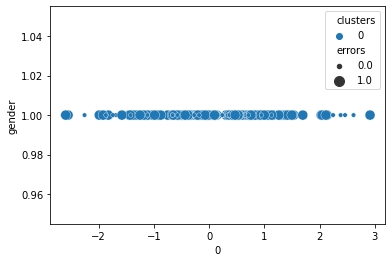

----- Clustering Iteration 1
Splitting on cluster 0


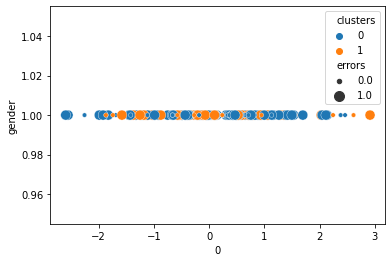

--> Cluster with the highest variance: 0
Variance clusters:  0.001991691177965568
----- Clustering Iteration 2
Splitting on cluster 0


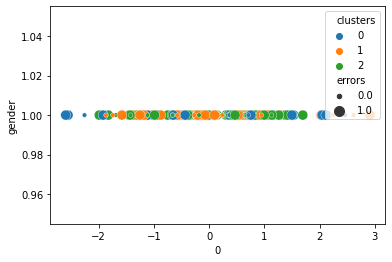

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 1
Variance clusters:  0.0015653534801702256
----- Clustering Iteration 3
Splitting on cluster 1


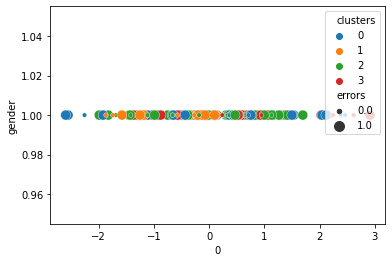

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 2
Variance clusters:  0.002127243366192937
----- Clustering Iteration 4
Splitting on cluster 2


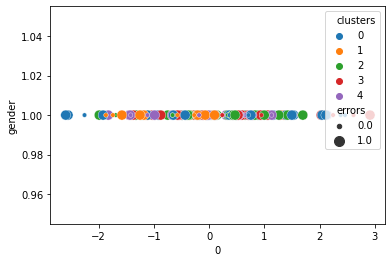

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 3
Variance clusters:  0.005630109231484739
----- Clustering Iteration 5
Splitting on cluster 3
Initial bias: 0.0052631578947368585   -  Max abs. candidate bias: 0.0050505050505050275
Min candidate size: 8
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.005630109231484739
----- Clustering Iteration 6
Splitting on cluster 4


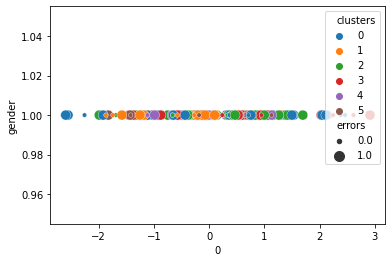

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 3
Variance clusters:  0.006609275710107969
----- Clustering Iteration 7
Splitting on cluster 3
Initial bias: 0.0052631578947368585   -  Max abs. candidate bias: 0.0050505050505050275
Min candidate size: 8
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.006609275710107969
----- Clustering Iteration 8
Splitting on cluster 5


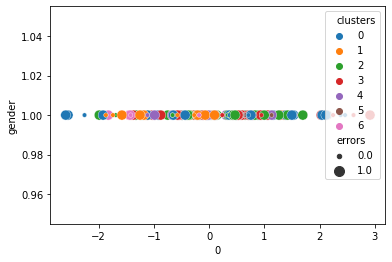

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 3
Variance clusters:  0.009600641881539152
----- Clustering Iteration 9
Splitting on cluster 3
Initial bias: 0.0052631578947368585   -  Max abs. candidate bias: 0.0050505050505050275
Min candidate size: 8
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.009600641881539152
----- Clustering Iteration 10
Splitting on cluster 2


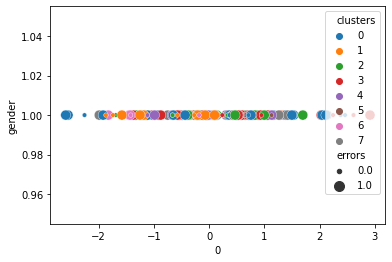

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 2
--> Cluster with the highest variance: 3
Variance clusters:  0.024032455696786865
----- Clustering Iteration 11
Splitting on cluster 3
Initial bias: 0.0052631578947368585   -  Max abs. candidate bias: 0.0050505050505050275
Min candidate size: 8
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.024032455696786865
----- Clustering Iteration 12
Splitting on cluster 2


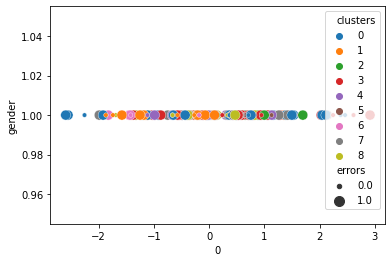

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 3
Variance clusters:  0.022383881880078907
----- Clustering Iteration 13
Splitting on cluster 3
Initial bias: 0.0052631578947368585   -  Max abs. candidate bias: 0.0050505050505050275
Min candidate size: 8
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.022383881880078907
----- Clustering Iteration 14
Splitting on cluster 1


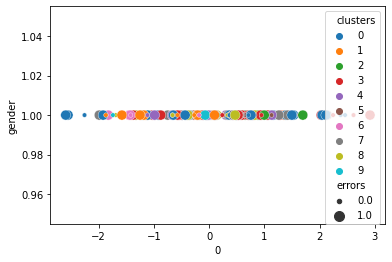

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 3
Variance clusters:  0.021478725112428362
----- Clustering Iteration 15
Splitting on cluster 3
Initial bias: 0.0052631578947368585   -  Max abs. candidate bias: 0.0050505050505050275
Min candidate size: 8
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.021478725112428362
----- Clustering Iteration 16
Splitting on cluster 8


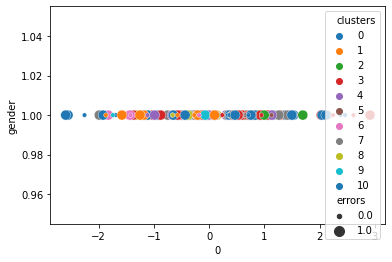

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 3
Variance clusters:  0.0203087429601268
----- Clustering Iteration 17
Splitting on cluster 3
Initial bias: 0.0052631578947368585   -  Max abs. candidate bias: 0.0050505050505050275
Min candidate size: 8
The selected cluster is not splitted. Picking a random cluster...
Variance clusters:  0.0203087429601268
----- Clustering Iteration 18
Splitting on cluster 7


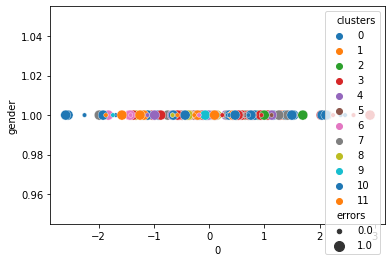

--> Cluster with the highest variance: 0
--> Cluster with the highest variance: 3
Variance clusters:  0.03156482245346138
----- Clustering Iteration 19
Splitting on cluster 3
Initial bias: 0.0052631578947368585   -  Max abs. candidate bias: 0.0050505050505050275
Min candidate size: 8
The selected cluster is not splitted. Picking a random cluster...
MAX_ITER
[0.001991691177965568, 0.0015653534801702256, 0.002127243366192937, 0.005630109231484739, 0.005630109231484739, 0.006609275710107969, 0.006609275710107969, 0.009600641881539152, 0.009600641881539152, 0.024032455696786865, 0.024032455696786865, 0.022383881880078907, 0.022383881880078907, 0.021478725112428362, 0.021478725112428362, 0.0203087429601268, 0.0203087429601268, 0.03156482245346138]


In [80]:
MAX_ITER = 20
x = 0 # cluster number
initial_bias = 0
plot_clusters(full_data)
variance_list = []

for i in range(1, MAX_ITER):
    if i != 1:
        neg_bias_list = []
        for j in full_data['clusters'].unique():
            neg_bias_clus = bias_acc(full_data, j, 'clusters')
            neg_bias_list.append(neg_bias_clus)
        variance_clusters = np.var(neg_bias_list)
        variance_list.append(variance_clusters) #TODO make function 
        print('Variance clusters: ', variance_clusters)
    print('----- Clustering Iteration', i)
    print('Splitting on cluster', x)

    full_data['new_clusters'] = -1
    candidate_cluster = full_data.loc[full_data['clusters'] == x] 
    #print(candidate_cluster.head())

    if len(candidate_cluster) < 8:
        print('The selected cluster is not splitted. Picking a random cluster...')
        n_cluster = max(full_data['clusters'])
        x = random.randint(0, n_cluster)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
        continue
    
    # Apply Kmeans 
    kmeans_algo = KMeans(**clus_model_kwargs).fit(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1))
    
    candidate_cluster['new_clusters'] = pd.DataFrame(kmeans_algo.predict(candidate_cluster.drop(['clusters', 'new_clusters', 'predicted_class', 'true_class', 'errors'], axis=1)),index=candidate_cluster.index) 
    # print(candidate_cluster.head())

    full_data['new_clusters'] = candidate_cluster['new_clusters'].combine_first(full_data['new_clusters'])
    # print(full_data.head())
        
    # calculate bias & cluster size for each of the two clusters
    negative_bias_0 = bias_acc(full_data, 0, 'new_clusters')
    negative_bias_1 = bias_acc(full_data, 1, 'new_clusters') 
    max_abs_bias = max(abs(negative_bias_0), abs(negative_bias_1))
    min_new_size = min( len(full_data.loc[full_data['new_clusters']==0]), len(full_data.loc[full_data['new_clusters']==1]) )
    
    if (max_abs_bias >= initial_bias) & (min_new_size > 1): 
        # Add new cluster
        n_cluster = max(full_data['clusters'])
        full_data['clusters'][full_data['new_clusters'] == 1] =  n_cluster + 1
        #print(full_data.head())
        
        plot_clusters(full_data)

        x = get_next_cluster(full_data)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
    else:
        print('Initial bias:', initial_bias, '  -  Max abs. candidate bias:', max_abs_bias)
        print('Min candidate size:', min_new_size)
        print('The selected cluster is not splitted. Picking a random cluster...')
        n_cluster = max(full_data['clusters'])
        x = random.randint(0, n_cluster)
        initial_bias = abs(bias_acc(full_data, x, 'clusters'))
        
print('MAX_ITER')

print(variance_list)

### Calculating the variance of the biases

,variance
0,0.001992
1,0.001565
2,0.002127
3,0.005630
4,0.005630
5,0.006609
6,0.006609
7,0.009601
8,0.009601
9,0.024032


<AxesSubplot:ylabel='variance'>

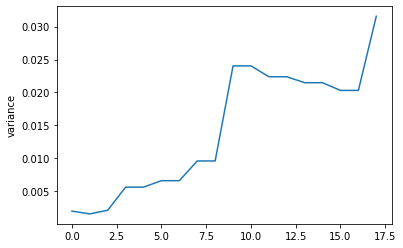

In [81]:
variance_df = pd.DataFrame(variance_list).rename(columns={0:"variance"})
display(variance_df)
sns.lineplot(data=variance_df, x=variance_df.index,y="variance")

In [82]:
# exporting the biased cluster dataframe for further analysis
import os
path = r'..\\Clustered_datasets\\'
full_data.to_csv(os.path.join(path, r'biased_theoretical_clusters.csv'))
